In [1]:
!pip install tensorflow==2.12.0

INFO: pip is looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.0/586.0 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 66.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 58.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 77.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 28.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 83.7 MB/s eta 0:00:00
 

In [1]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [2]:
## Import some basic libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df = pd.read_csv("Churn_Modelling.csv")

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
##Divide the dataset into independent and dependent features

X = df.iloc[:,3:13]
y = df.iloc[:, 13]

In [7]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [8]:
##Feature Engineering
geography = pd.get_dummies(X['Geography'], drop_first = True)

In [9]:
geography.head()

,Germany,Spain
0,False,False
1,False,True
2,False,False
3,False,False
4,False,True


In [10]:
gender = pd.get_dummies(X['Gender'], drop_first = True)

In [11]:
##Concatenate these variables with dataframe
X.drop(['Geography', 'Gender'], axis = 1, inplace = True)

In [12]:
X = pd.concat([X, geography, gender], axis = 1)

In [13]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False


In [14]:
##Split the dataset into training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [15]:
##Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [16]:
X_train

array([[ 0.35649971, -0.6557859 ,  0.34567966, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.20389777,  0.29493847, -0.3483691 , ...,  1.72572313,
        -0.57638802,  0.91324755],
       [-0.96147213, -1.41636539, -0.69539349, ..., -0.57946723,
         1.73494238,  0.91324755],
       ...,
       [ 0.86500853, -0.08535128, -1.38944225, ..., -0.57946723,
        -0.57638802, -1.09499335],
       [ 0.15932282,  0.3900109 ,  1.03972843, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [ 0.47065475,  1.15059039, -1.38944225, ...,  1.72572313,
        -0.57638802,  0.91324755]])

In [17]:
## Create the ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU, ELU, ReLU
from tensorflow.keras.layers import Dropout

In [38]:
 #Intialize the ANN
 classifier = Sequential()


In [39]:
##Adding the Input layers
##Inorder to add the i/p layer to ANN we need to use Dense and having 11 units meand 11 inputs features
##We are saying what activation funtion we need to use for next layer.
classifier.add(Dense(units = 11, activation = 'relu'))
classifier.add(Dropout(0.2))

In [43]:
##Adding the first Hidden layer
classifier.add(Dense(units = 7, activation = 'relu'))
##second layer
classifier.add(Dense(units = 6, activation = 'relu'))

In [44]:
##Adding the output layer
classifier.add(Dense(units = 1, activation = 'sigmoid'))

In [45]:
##compiling the model
classifier.compile(optimizer= 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [46]:
##if you want to choose your own learning rate (default for adam optimizer is 0.001)
import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [47]:
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [48]:
##Training the model
model_history = classifier.fit(X_train, y_train, validation_split = 0.33, batch_size = 10, epochs = 1000, callbacks= early_stopping)

Epoch 1/1000
536/536 [==============================] - 3s 2ms/step - loss: 0.5293 - accuracy: 0.7962 - val_loss: 0.4856 - val_accuracy: 0.7910
Epoch 2/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.4683 - accuracy: 0.7962 - val_loss: 0.4611 - val_accuracy: 0.7910
Epoch 3/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.4429 - accuracy: 0.7962 - val_loss: 0.4371 - val_accuracy: 0.7910
Epoch 4/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.4192 - accuracy: 0.7962 - val_loss: 0.4195 - val_accuracy: 0.7910
Epoch 5/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.4071 - accuracy: 0.7968 - val_loss: 0.4101 - val_accuracy: 0.7910
Epoch 6/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.4010 - accuracy: 0.8145 - val_loss: 0.4025 - val_accuracy: 0.8220
Epoch 7/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3914 - accuracy: 0.8272 - val_loss: 0.3992 - val_accuracy:

In [29]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

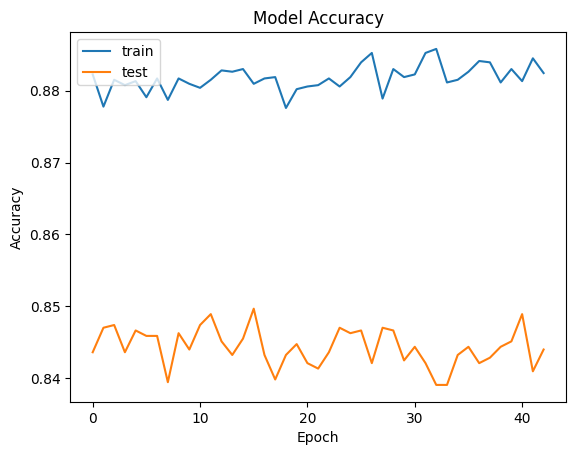

In [30]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'],loc='upper left')
plt.show()

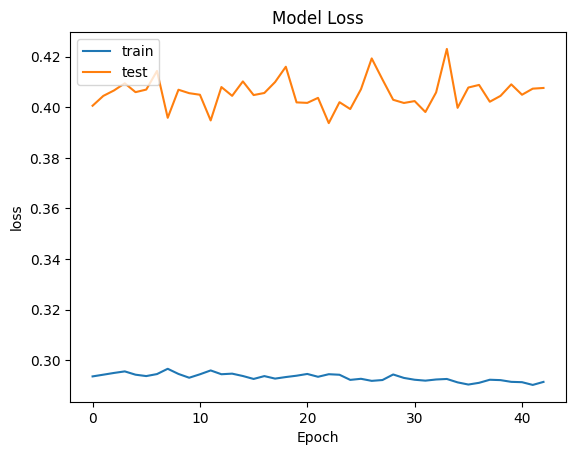

In [31]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'],loc='upper left')
plt.show()

In [34]:
##Predicting and evaluating the model
y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)

63/63 [==============================] - 0s 2ms/step


In [35]:
##make the confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[1512,   95],
       [ 200,  193]])

In [36]:
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(y_pred, y_test)
acc_score

0.8525

In [37]:
##how to get the weights
classifier.get_weights()

[array([[ 0.5562672 ,  0.6528122 , -0.05124879, -0.49993008,  0.09315157,
          0.08262746,  0.12662296,  0.00597152, -0.17546594,  0.08991753,
         -0.17800085],
        [-0.19311953, -1.0731388 , -0.7171867 , -0.37595448,  0.2217779 ,
          0.9585044 , -0.17734954,  0.56913847, -0.04996459,  0.5642527 ,
          1.2446707 ],
        [ 0.39467686, -0.09789639, -0.41149485, -0.7707823 , -0.15373462,
          0.3012439 , -0.0481935 ,  0.03823426, -0.12869416, -0.1435225 ,
         -0.27646464],
        [-0.3608353 , -0.9448462 , -0.19818659,  0.6229613 ,  0.14485122,
         -0.13879721, -1.0104246 , -0.7639357 , -0.2831051 ,  0.17633191,
         -0.12725161],
        [ 0.87095153, -0.05829585, -0.20434476, -0.2304814 , -0.10125651,
         -1.0084606 , -1.2997838 , -0.52647424,  0.4687194 ,  1.2739172 ,
         -0.29163268],
        [ 0.46824303, -0.32489726, -0.1249797 , -0.16151904, -0.28339365,
         -0.1520206 , -0.16805905, -0.29079273, -0.60999   , -0.5352508